In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Preprocessing

In [138]:
#loading the dataset
data=pd.read_csv("HR Employee Attrition.csv") 

In [139]:
#Displaying the first 5 records of the dataset
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [140]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [141]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [142]:
data.shape
#1470 rows and 35 columns

(1470, 35)

In [143]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [144]:
data.isna().sum()
#Checking for null values

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [145]:
numeric_features=[]
categorical_features=[]
for col in data.columns:
    if data[col].dtype=='int64':
        numeric_features.append(col)
    else:
        categorical_features.append(col)
categorical_features

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

# Exploratory Data Analysis

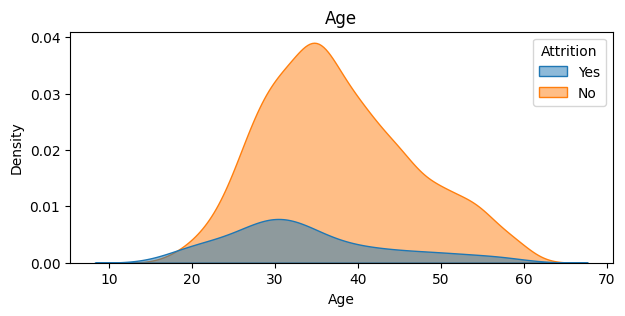

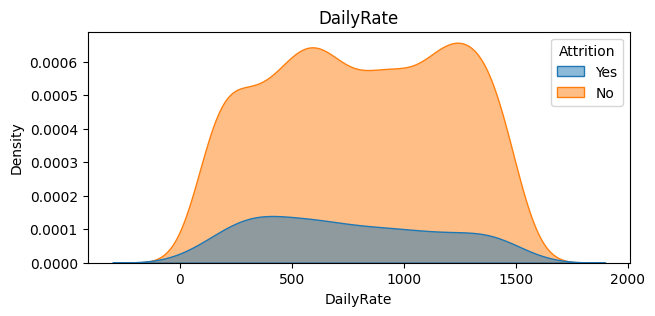

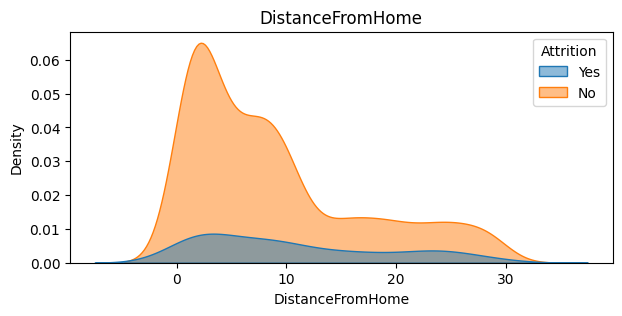

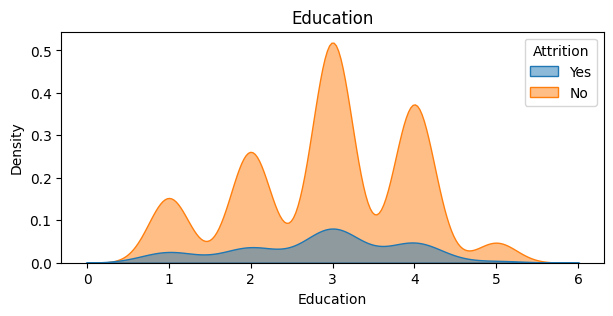

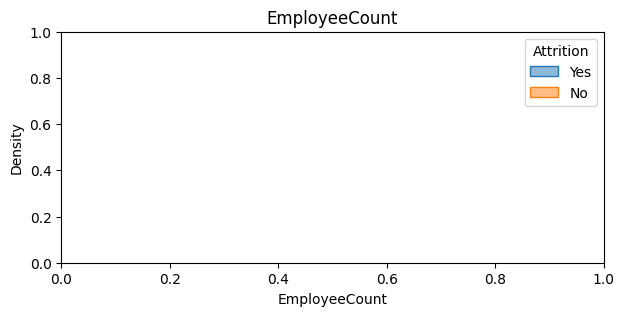

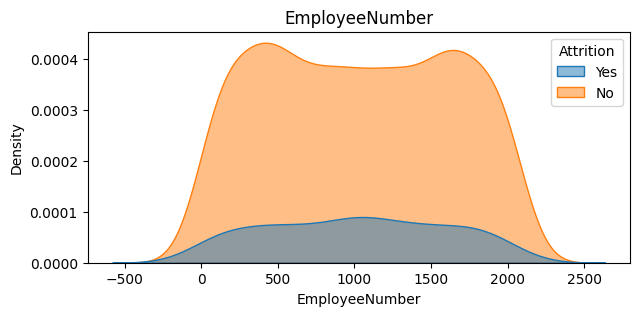

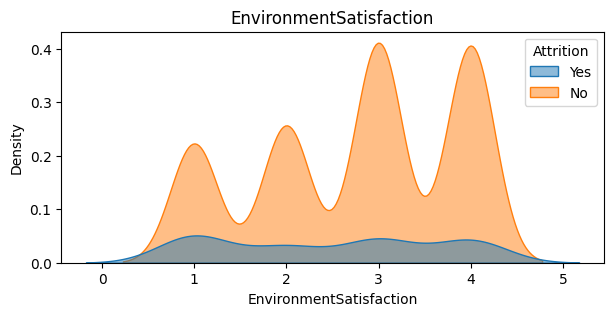

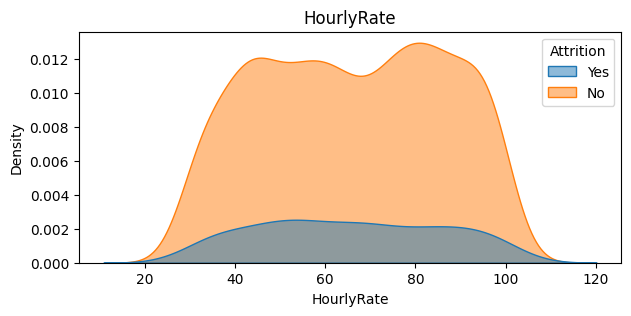

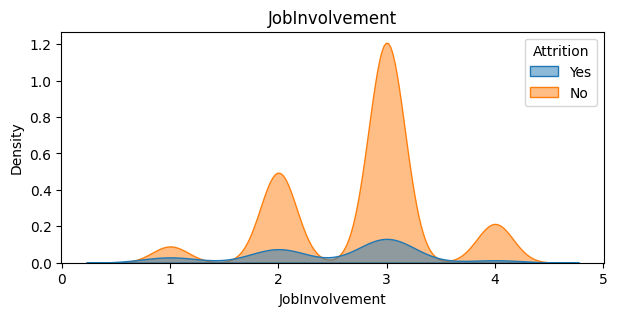

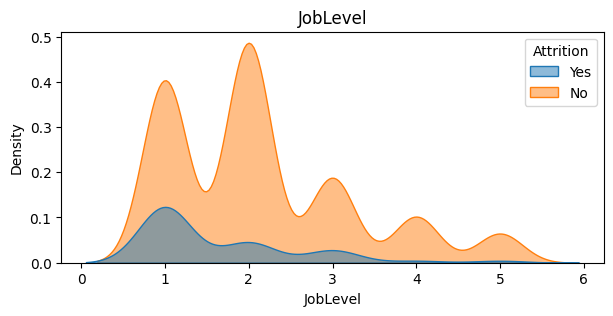

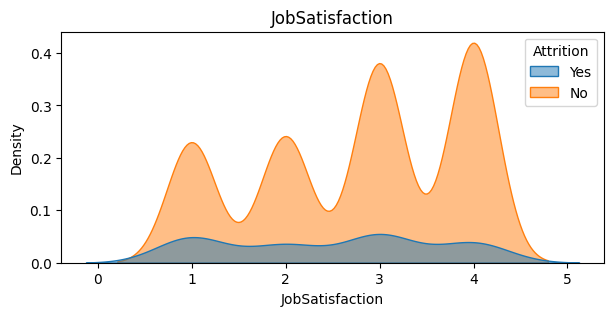

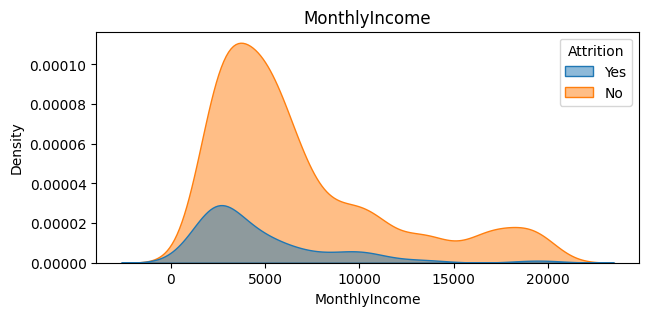

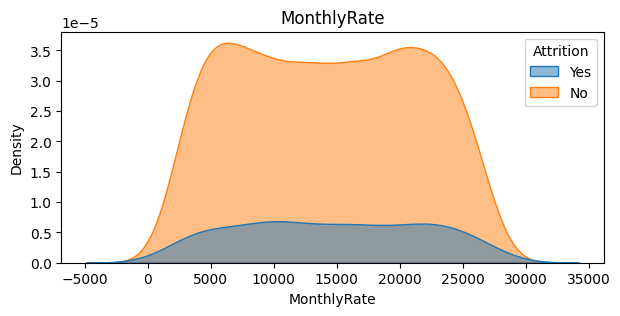

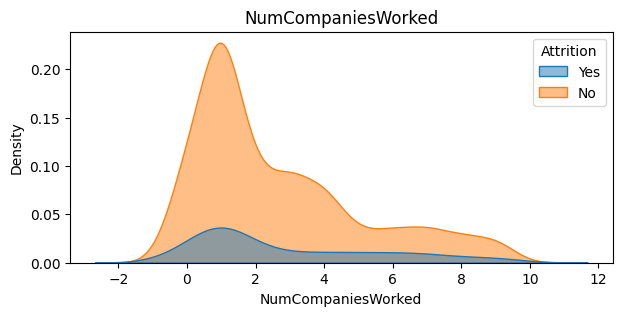

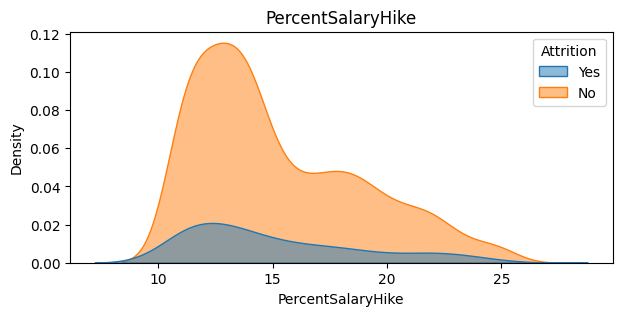

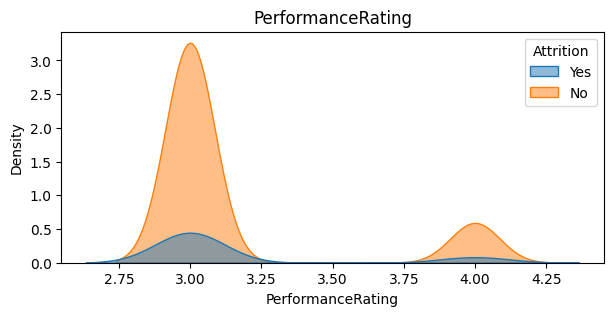

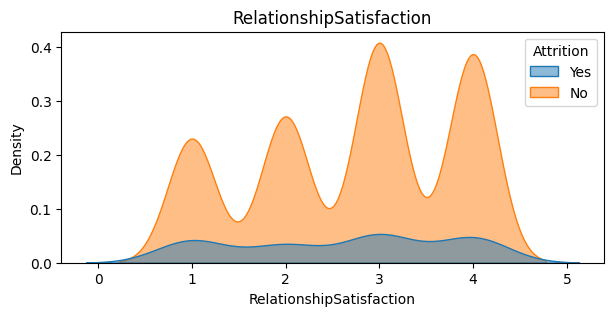

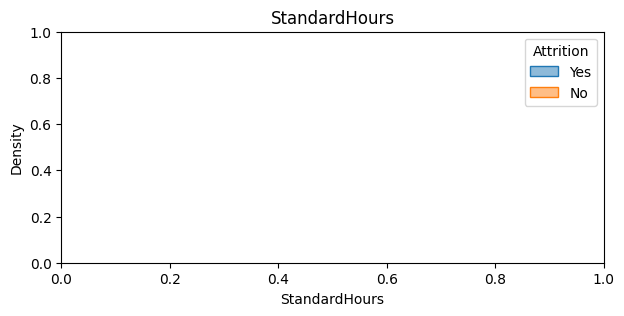

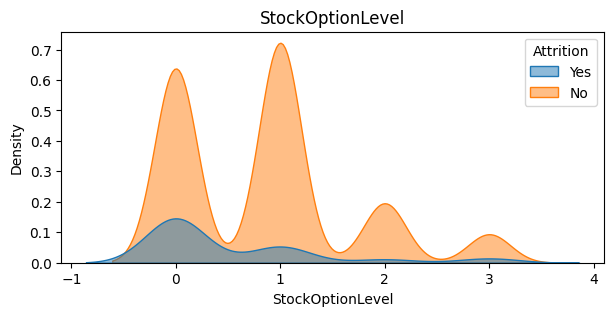

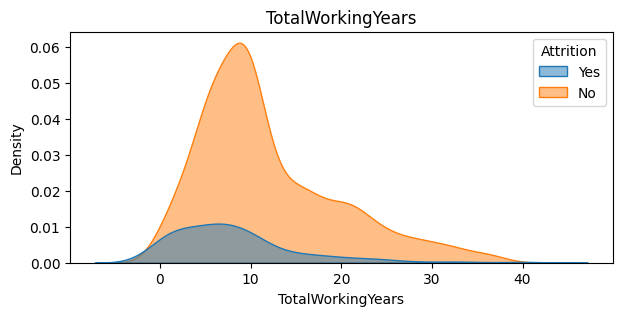

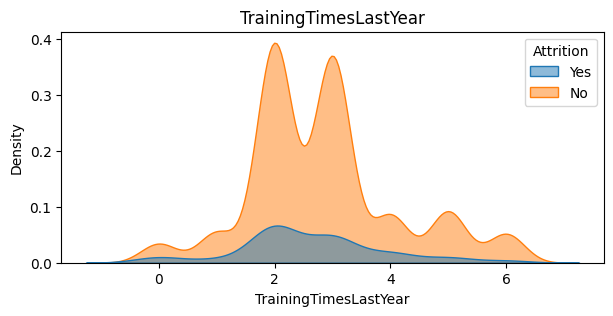

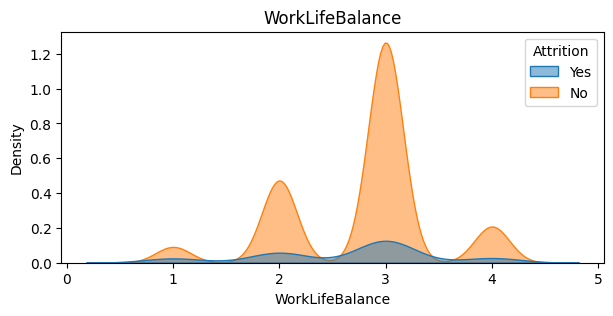

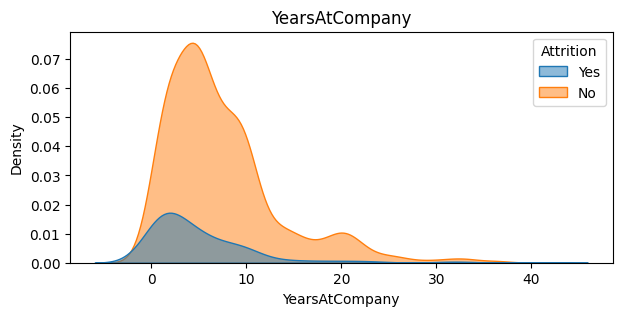

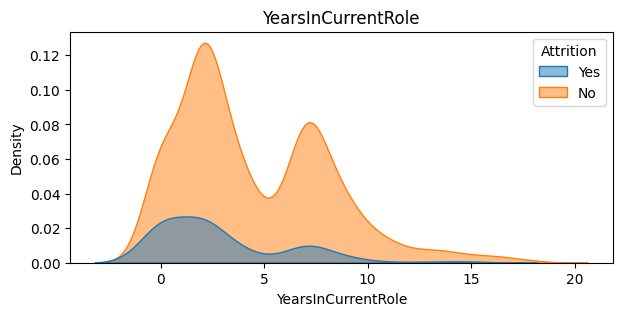

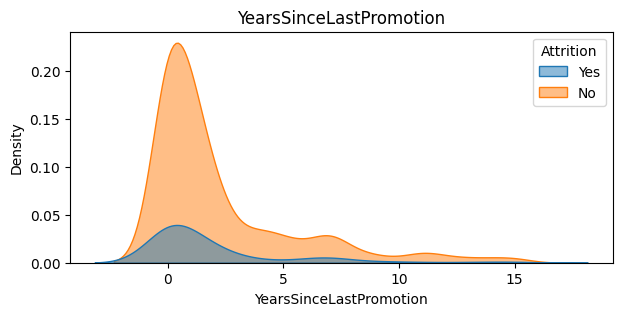

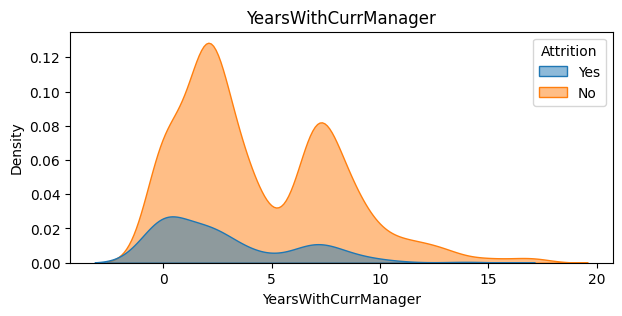

In [146]:
#Visualizing the effect of numeric features on employee attrition

for column in numeric_features:
    plt.figure(figsize=(7,3))
    sns.kdeplot(data=data, x=column,hue="Attrition", fill=True, alpha=.5,warn_singular=False)
    plt.title(column)
    plt.show()

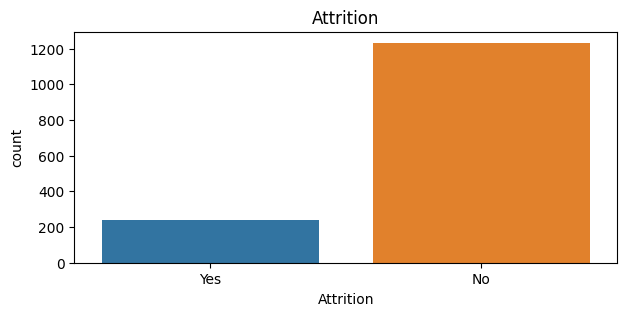

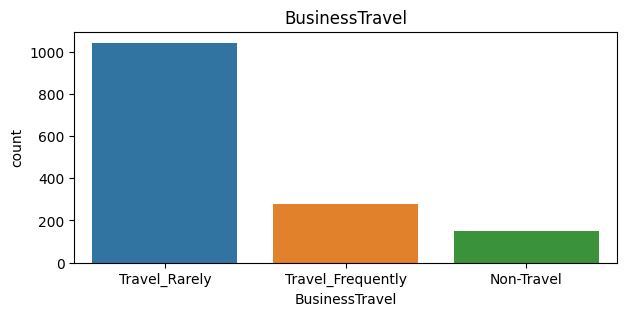

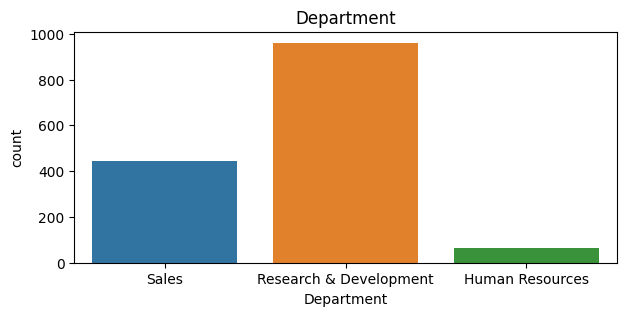

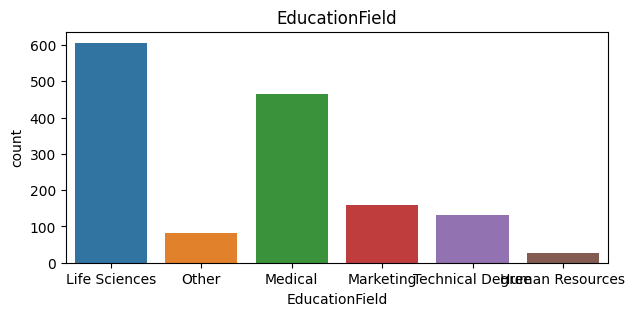

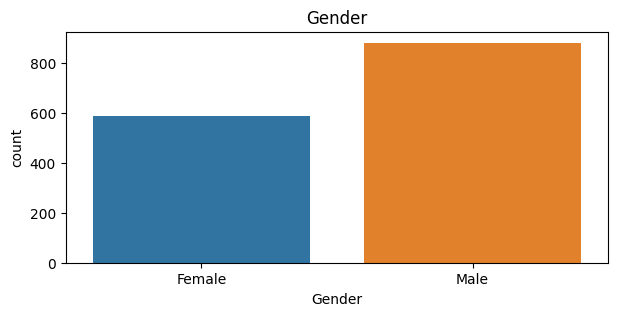

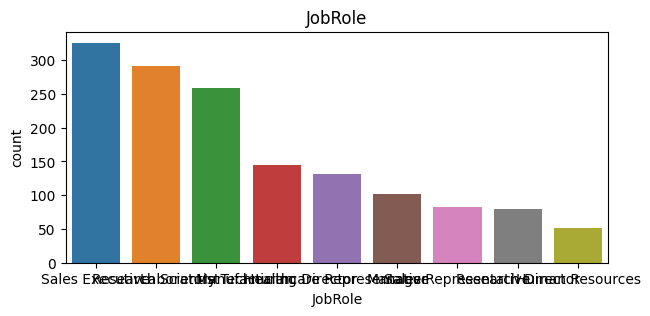

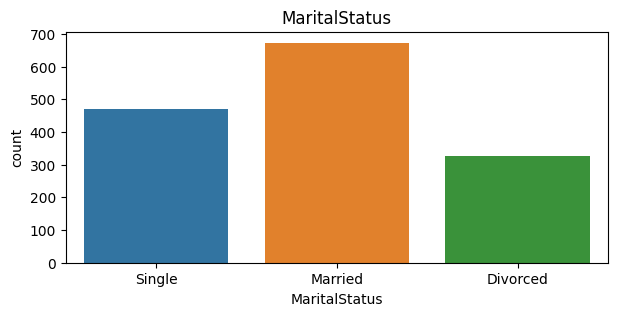

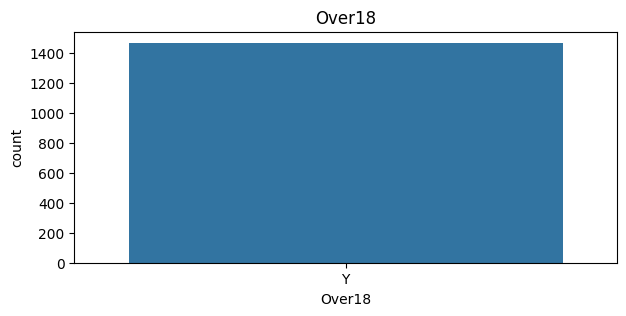

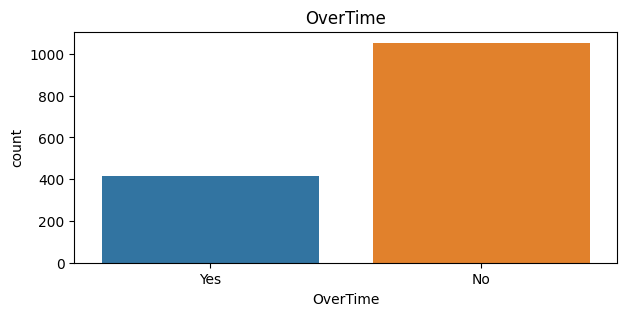

In [147]:
for column in categorical_features:
    plt.figure(figsize=(7,3))
    sns.countplot(x=data[column])
    plt.title(column)
    plt.show()

# Data Preprocessing

In [148]:
#Converting categorical data to numerical data

Y=data["Attrition"]
attrition={"Yes":1,"No":0}
Y=Y.map(attrition)
Y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [149]:
X=data.drop(columns=["Attrition"])
categorical_features.remove("Attrition")
mappings=[]
for feature in categorical_features:
    mapping={}
    temp=0
    for key in set(X[feature]):
        mapping[key]=temp
        temp+=1
    X[feature]=X[feature].map(mapping)
    mappings.append(mapping)
    
for i in range(len(categorical_features)):
    print(categorical_features[i])
    print(mappings[i])

BusinessTravel
{'Travel_Frequently': 0, 'Travel_Rarely': 1, 'Non-Travel': 2}
Department
{'Research & Development': 0, 'Sales': 1, 'Human Resources': 2}
EducationField
{'Other': 0, 'Medical': 1, 'Technical Degree': 2, 'Life Sciences': 3, 'Marketing': 4, 'Human Resources': 5}
Gender
{'Male': 0, 'Female': 1}
JobRole
{'Research Scientist': 0, 'Sales Representative': 1, 'Healthcare Representative': 2, 'Human Resources': 3, 'Laboratory Technician': 4, 'Manager': 5, 'Sales Executive': 6, 'Research Director': 7, 'Manufacturing Director': 8}
MaritalStatus
{'Divorced': 0, 'Single': 1, 'Married': 2}
Over18
{'Y': 0}
OverTime
{'Yes': 0, 'No': 1}


In [150]:
X

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1102,1,1,2,3,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,0,279,0,8,1,3,1,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,1,1373,0,2,2,0,1,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1392,0,3,4,3,1,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,1,591,0,2,1,1,1,7,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,0,23,2,1,1,2061,3,...,3,80,1,17,3,3,5,2,0,3
1466,39,1,613,0,6,1,1,1,2062,4,...,1,80,1,9,5,3,7,7,1,7
1467,27,1,155,0,4,3,3,1,2064,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,1023,1,2,3,1,1,2065,4,...,4,80,0,17,3,2,9,6,0,8


# Splitting the data

In [167]:
X_new, X_test, y_new, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_new, y_new, test_size=0.11, random_state=0)

In [168]:
print(X_train.shape) #Training Data
print(y_train.shape)
print(X_test.shape) #Testing Data
print(y_test.shape)
print(X_val.shape) #Validation Data
print(y_val.shape)

(1177, 34)
(1177,)
(147, 34)
(147,)
(146, 34)
(146,)
